## 2.1 신경망과의 첫 만남

---

 손글씨 숫자 분류를 학습하는 구체적인 신경망 예제

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


train_images, train_labels 가 학습해야할 훈련세트를 구성하고<br>
test_images, test_labels로 구성된 테스트 세트에서 테스트 됨<p/>

이미지는 넘파이 배열로 인코딩되어있고<br>
레이블은 0~9까지의 숫자 배열<br>
   * 넘파이 = 행렬, 다차원 배열 처리 라이브러리

#### 코드 2-1 케라스에서 MNIST 데이터셋 적재하기

MNIST = modified NIST
NIST의 데이터는 미국인구 조사국에서 트레이닝 데이터를
고등학생에게 테스트 데이트를 받아옴

머신러닝에서 제대로된 예측을 하기 위해선 트레이닝 = 테스트 데이터여야 함

NIST 를재구성 한것이 MNIST

모든 숫자가 28 * 28픽셀로 이뤄짐 60000개의 트레이닝 데이터와 10000개의 테스트 데이터로 이뤄짐

In [2]:
train_images.shape
# 60000개의 이미지가 28*28픽셀로 저장되어 있음

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

uint8	부호 없는(unsigned) 8비트, 1바이트 정수	0 ~ 255

In [5]:
test_images.shape

(10000, 28, 28)

작업순서

train 이미지, 레이블 네트워크에 주입<br> &rarr; 네트워크는 학습<br> &rarr; test 이미지 예측<br>
&rarr; test 레이블과 맞는지 확인

In [6]:
temp = test_images[1]

temp.ndim

2

#### 코드 2-2 신경망 구조

In [7]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
network.add(layers.Dense(10,activation = 'softmax'))

신경망의 핵심 구성요소 = 층(layer)
층(layer)이란 데이터 처리 필터, 어떤 데이터가 들어가면 더 유용한 형태로 출력

#### 코드 2-3 컴파일 단계

In [8]:
network.compile(optimizer='rmsprop',
                loss="categorical_crossentropy",
                metrics=['accuracy'])

신경망이 훈련 준비를 마치기 위해 컴파일 단계에 세가지가 더 필요

1. 손실함수(loss function) : 네트워크가 옳은 방향으로 학습될수 있도록 지원
2. 옵티마이저(optimizer) : 입력된 데이터와 손실 함수를 기반으로 네트워크 업데이트
3. 훈련, 테스트 과정을 모니터링할 지표 

#### 코드 2-4 이미지 데이터 준비하기

In [9]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

#### 코드 2-5 레이블 준비하기

In [10]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network.fit(train_images, train_labels, epochs = 5, batch_size=64)

Epoch 1/5


In [12]:
test_lass, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 72us/step


In [13]:
print('test_acc : ', test_acc)

test_acc :  0.9795


## 2.2 신경망을 위한 데이터 표현

---

텐서<br>
텐서는 모든 머신 러닝 시스템의 기본 데이터 구조<br>

텐서란?<br>
텐서는 데이터를 위한 컨테이너 거의 수치형 데이터를 다루므로 숫자를 위한 컨테이너임<br>
텐서에서는 차원을 종종 축이라고 부름

* 스칼라(0D 텐서)

In [24]:
import numpy as np

In [25]:
x = np.array(12)

In [26]:
type(x)

numpy.ndarray

In [27]:
x.ndim

0

* 벡터 (1D 텐서)

In [31]:
x1 = np.array([1,2,3,4,5])

In [32]:
x1.ndim

1

* 행렬 (2D 텐서)

In [45]:
x2 = np.array([[0,1,2],
              [3,4,5],
              [6,7,8]])

In [35]:
x2.ndim

2

In [44]:
x2.shape  #행 x 열

(3, 4)

* 3D 혹은 고차원 텐서

In [56]:
x3 = np.array([[[1,2,3],
               [4,5,6],
               [7,8,9]],
              [[10,11,12],
              [13,14,15],
              [16,17,18]],
              [[19,20,21],
              [22,23,24],
              [25,26,27]],
              ])

In [57]:
x3.ndim

3

In [58]:
x3.shape  # 축 x 행 x 열

(3, 3, 3)

### 텐서의 3가지 핵심속성

1. 축의 개수(랭크) : 넘파이 라이브러리에서 ndim 속성에 저장<br>
2. 크기(shape) : 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플 (배열 스칼라는 크기가 없음)<br>
3. 데이터 타입(넘파이에서는 dtype에 저장) : 턴서에 포함된 데이터의 타입, 텐서의 타입은 float32,float64,uint8 등이 될 수 있음<br>
텐서는 사전에 할당되어 연속된 메모리에 저장되어야하므로 넘파이 배열은 가변길이의 문자열을 지원하지 않음


In [67]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#mnist 데이터셋을 불러옴

In [68]:
print(train_images.ndim)

3


In [70]:
print(train_images.shape)  # 축 x 행 x 열

(60000, 28, 28)


In [71]:
print(train_images.dtype) # 정수형, 0~255

uint8


In [72]:
train_images[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

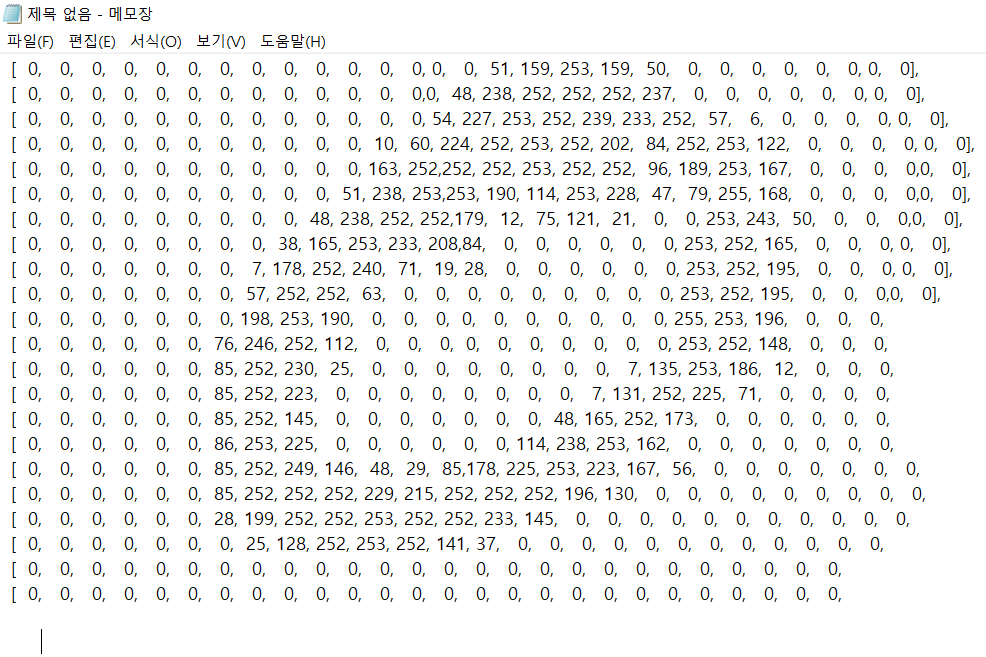

#### 코드 2-5 두번째 이미지 출력하기

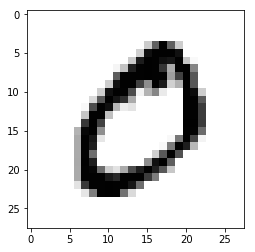

In [77]:
digit = train_images[1]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary) #cmap = colormap 표에나오는 값의 색 결정
                                      #https://chrisalbon.com/python/basics/set_the_color_of_a_matplotlib/
plt.show()

배열에 있는 특정 원소들 선택 하는것 = 슬라이싱(slicing)

In [78]:
train_images.shape

(60000, 28, 28)

이중에서 11번째에서 101번째 전까지 슬라이싱을 할경우

In [79]:
my_slice = train_images[10:100]
#my_slice = train_images[10:100,:,:]
#my_slice = train_images[10:100,0:28,0:28]
#모두 동일한 방법
print(my_slice.shape)

(90, 28, 28)


배열의 축을따라 일부분만 지정가능

In [80]:
my_slice = my_slice[:,14:,14:] #(오른쪽 x 아래)만 지정

음수 인덱스도 사용할수 있음

In [81]:
a = [1,2,3,4,5,6,7]
print(a[2:-3])

[3, 4]


### 배치 데이터

---

일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫번째 축은 샘플 축(sample axis)(혹은 샘플 차원(sample dimension)) 이다.<br>
MNIST예제 에서는 숫자 이미지가 샘플이다.<p/>

딥러닝 모델은 한번에 전체 데이터셋을 처리하지 않고 데이터를 작은 배치(batch)로 나눈다.<br>
MNSIT숫자데이터에서 크기가 128인 배치하나는 다음과 같이 나타낸다.

첫 배치<br>
batch = train_images[:128]<p/>
그다음 배치<br>
batch = train_images[128:256]<p/>
n번째 배치<br>
batch = train_images[128*n : 128*(n+1)]<p/>

이중 첫번째 축을 배치축(batch axis) 또는 배치차원(batch dimension) 이라고 부른다

### 텐서의 사례

   * 벡터 데이터 : (sampels, features) 크기의 2D 텐서
   * 시계열, 시퀀스(sequence) 데이터 : (samples, timesteps, features) 크기의 3D 텐서
   * 이미지 : (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
   * 동영상 : (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서

#### 1. 벡터 데이터
   * 대부분의 경우에 해당됨.
   * 이런 데이터셋에서는 하나의 데이터 포인트가 벡터로 인코딩될 수 있으므로 배치 데이터는 2D 텐서로 인코딩될 것입니다(즉 벡터의 배열입니다). 여기서 첫 번째 축은 샘플 축sample axis이고, 두 번째 축은 특성 축feature axis이다.

예시
1. 사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터.<br> 각사람은 3개 값을가진 벡터로 구성 만약 10만명이라면 전체 데이터셋은 (100000, 3) 크기의 텐서에 저장될 수 있음

#### 2. 시계열, 시퀀스(sequence) 데이터

데이터에서 시간이 (또는 연속된 순서가) 중요할 때는 시간 축을 포함하여 3D 텐서로 저장됨. 각 샘플은 벡터(2D 텐서)의 시퀀스로 인코딩되므로 배치 데이터는 3D 텐서로 인코딩될 것.

예시
* 주식 가격 데이터셋.<br>
1분마다 현재 주식 가격, 지난 1분 동안에 최고 가격과 최소 가격을 저장합니다. 1분마다 데이터는 3D 벡터로 인코딩되고 하루 동안의 거래는 (390, 3) 크기의 2D 텐서로 인코딩됩니다(하루의 거래 시간은 390분입니다. 250일치의 데이터는 (250, 390, 3) 크기의 3D 텐서로 저장될 수 있습니다. 여기에서 1일치 데이터가 하나의 샘플이 됨.

#### 3. 이미지 데이터

이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어집니다. (MNIST 숫자처럼) 흑백 이미지는 하나의 컬러 채널만을 가지고 있어 2D 텐서로 저장될 수 있지만 관례상 이미지 텐서는 항상 3D로 저장됩니다. 흑백 이미지의 경우 컬러 채널의 차원 크기는 1입니다. 256×256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256, 256, 1) 크기의 텐서에 저장될 수 있습니다. 컬러 이미지에 대한 128개의 배치라면 (128, 256, 256, 3) 크기의 텐서에 저장될 수 있습니다

이미지 텐서의 크기를 지정하는 방식은 두 가지입니다. (텐서플로에서 사용하는) 채널 마지막channel-last 방식과 (씨아노에서 사용하는) 채널 우선channel-first 방식입니다. 구글의 텐서플로 머신 러닝 프레임워크는 (samples, height, width, color_depth)처럼 컬러 채널의 깊이를 끝에 놓습니다. 반면에 씨아노는 (samples, color_depth, height, width)처럼 컬러 채널의 깊이를 배치 축 바로 뒤에 놓습니다. 씨아노 방식을 사용하면 앞선 예는 (128, 1, 256, 256)과 (128, 3, 256, 256)이 됩니다. 케라스 프레임워크는 두 형식을 모두 지원합니다.

#### 4. 동영상 데이터

비디오 데이터는 현실에서 5D 텐서가 필요한 몇 안 되는 데이터 중 하나입니다. 하나의 비디오는 프레임의 연속이고 각 프레임은 하나의 컬러 이미지입니다. 프레임이 (height, width, color_depth)의 3D 텐서로 저장될 수 있기 때문에 프레임의 연속은 (frames, height, width, color_depth)의 4D 텐서로 저장될 수 있습니다. 여러 비디오의 배치는 (samples, frames, height, width, color_depth)의 5D 텐서로 저장될 수 있습니다.

예를 들어 60초짜리 144×256 유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 240프레임이 됩니다. 이런 비디오 클립을 4개 가진 배치는 (4, 240, 144, 256, 3) 크기의 텐서에 저장될 것입니다. 총 106,168,320개의 값이 있습니다! 이 텐서의 dtype을 float32로 했다면 각 값이 32비트로 저장될 것이므로 텐서의 저장 크기는 405MB가 됩니다. 하지만 실생활에서 접하는 비디오는 float32 크기로 저장되지 않고 높은 압축률(MPEG 포맷 같은 방식) 으로 압축되어 있습니다.

## 2.3 신경망의 톱니바퀴 : 텐서 연산

컴퓨터 프로그램을 이진수의 입력을 처리하는 몇 개의 이항 연산(AND, OR, NOR 등)으로 표현할 수 있는 것처럼,<br> 
심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하는 몇 종류의 텐서 연산tensor operation으로 나타낼 수 있습니다. 예를 들어 텐서 덧셈이나 텐서 곱셈 등입니다.

In [124]:
layers.Dense(512, activation='relu') #맨 처음 예제에서의 층을 쌓는 방법
#activation function 이 relu이다

ReLu는 Rectified Linear Unit의 약자

activation function로 sigmoid function함수를 사용할경우 Backpropagation에서 layer를 지나면서 비중이 적게 전달되는 문제를 해결하기 위해 ReLu 함수를 activation function으로 사용

#### ReLu는 입력값이 0보다 작으면 0이고 0보다 크면 입력값 그대로를 내보낸다. 

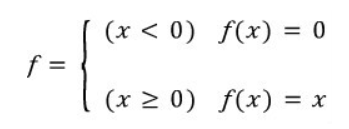
https://mongxmongx2.tistory.com/25

relu((W * input)+b) <br>
여기에는 3개의 텐서 연산이 있습니다. 입력 텐서와 텐서 W 사이의 점곱(dot), 점곱의 결과인 2D 텐서와 벡터 b 사이의 덧셈(+), 마지막으로 relu(렐루) 연산입니다. 

## 2.3.1 원소별 연산

relu 함수와 덧셈은 원소별 연산입니다.
이 두 연산은 텐서에 있는 각 원소에 독립적으로 적용됩니다.

relu function

In [125]:
def naive_relu(x):
    assert len(x.shape) == 2    # x는 2D 넘파이 배열입니다. 아닐경우 asserterror 발생
    x = x.copy()                # 입력 텐서 자체를 바꾸지 않도록 복사합니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [93]:
train_images.shape

(60000, 28, 28)

In [107]:
x = [[1,2,3],
    [4,5,6],
    [7,8,9]]
ab = np.array(x)

In [103]:
len(ab.shape)

2

In [114]:
ab.shape

(3, 3)

In [113]:
ab.shape[0]

3

In [110]:
ans = naive_relu(ab)
ans

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

덧셈의 원소별 연산

In [119]:
def naive_add(x, y):
    assert len(x.shape) == 2     # x와 y는 2D 넘파이 배열입니다.
    assert x.shape == y.shape

    x = x.copy()                 # 입력 텐서 자체를 바꾸지 않도록 복사합니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

위의 방법으로 곱셈, 뺄셈이 가능합니다.

하지만 넘파이 내장 함수를 사용하면 이런 연산을 간단히 처리할수있습니다.

In [123]:
z = [-1,-2,-3,-4,10,20]
z = np.maximum(z,0)
z #원소별 렐루 함수

array([ 0,  0,  0,  0, 10, 20])

In [60]:
a = [1,2,3]

In [65]:
a+a

[1, 2, 3, 1, 2, 3]

In [61]:
type(a)

list

In [62]:
b = np.array(a)

In [63]:
b+b

array([2, 4, 6])

In [64]:
type(b)

numpy.ndarray

## 2.3.2 브로드캐스팅

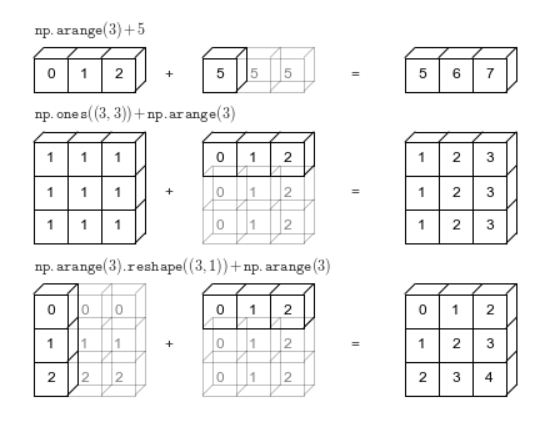
https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

In [126]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2   # x는 2D 넘파이 배열입니다.
    assert len(y.shape) == 1   # y는 넘파이 벡터입니다.
    assert x.shape[1] == y.shape[0]
    x = x.copy()               # 입력 텐서 자체를 바꾸지 않도록 복사합니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

### 2.3.3 텐서 점곱

텐서 곱셈은 (원소별 곱셈 X) 원소별 연산과 반대로 입력 텐서의 원소들을 결합시킴

넘파이, 케라스, 씨아노, 텐서플로에서 원소별 곱셈은 * 연산자<br>
넘파이와 케라스는 점곱 연산에 보편적인 dot 연산자를 사용합니다.

1. 2개의 벡터 x와 y의 점곱은 다음과 같이 계산을 합니다.

In [127]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1  # x와 y는 넘파이 벡터입니다.
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]

    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [131]:
a = np.array([2,4,8,16])
b= np.array([1,2,0,3])
ans = naive_vector_dot(a,b)
ans

58.0

2.행렬 x와 벡터 y 사이에서도 점곱이 가능합니다. 

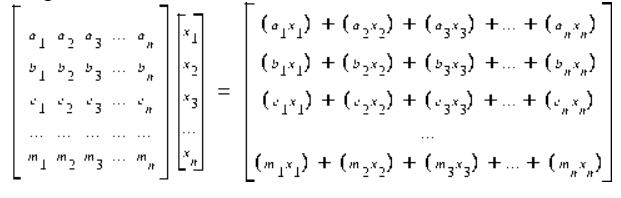
http://cs.brown.edu/stc/summer/94GeoTrans/94GeoTrans_31.html

In [ ]:
import numpy as np
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2   # x는 넘파이 행렬입니다.
    assert len(y.shape) == 1   # y는 넘파이 벡터입니다.
    assert x.shape[1] == y.shape[0]  # x의 두 번째 차원이 y의 첫 번째 차원과 같아야 합니다!

    z = np.zeros(x.shape[0])   # 이 연산은 x의 행과 같은 크기의 0이 채워진 벡터를 만듭니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

3.행렬 x와 행렬 y 사이에서도 점곱이 가능합니다. 

In [132]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2   # x와 y는 넘파이 행렬입니다.
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]  # x의 두 번째 차원이 y의 첫 번째 차원과 같아야 합니다!

    z = np.zeros((x.shape[0], y.shape[1]))  # 이 연산은 0이 채워진 특정 크기의 벡터를 만듭니다.
    for i in range(x.shape[0]):     # x의 행을 반복합니다.
        for j in range(y.shape[1]): # y의 열을 반복합니다.
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

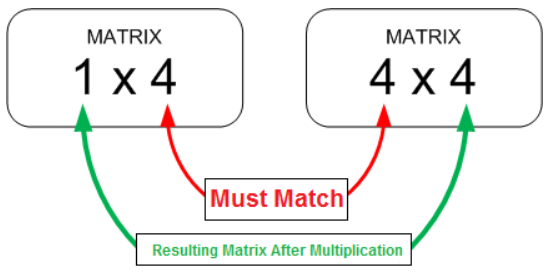
http://studytipsandtricks.blogspot.com/2012/07/write-c-program-to-print-multiplication.html

더 일반적으로는 앞서 설명한 2D의 경우처럼 크기를 맞추는 동일한 규칙을 따르면 다음과 같이 고차원 텐서 간의 점곱을 할 수 있습니다.<br>
(a, b, c, d) . (d,) -> (a, b, c) <p/>

(a, b, c, d) . (d, e) -> (a, b, c, e)

### 2.3.4 텐서 크기 변환

텐서의 크기를 변환한다는 것은 특정 크기에 맞게 열과 행을 재배열한다는 뜻입니다. 당연히 크기가 변환된 텐서는 원래 텐서와 원소 개수가 동일합니다.

In [134]:
x = np.array([[0, 1],
              [2, 3],
              [4, 5]])

In [135]:
print(x.shape)

(3, 2)


In [136]:
x = x.reshape(6,1)

In [137]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [138]:
x = x.reshape(5,1)

ValueError: cannot reshape array of size 6 into shape (5,1)

자주 사용하는 전환은 전치transposition 이다.


(6,1)행렬 --> (1,6)행렬로 변환

In [139]:
print(x.shape)

(6, 1)


In [140]:
x = np.transpose(x)
print(x.shape)

(1, 6)


### 2.3.5 텐서 연산의 기하학적 해석

텐서 연산이 조작하는 텐서의 내용은 어떤 기하학적 공간에 있는 좌표 포인트로 해석될 수 있기 때문에 모든 텐서 연산은 기하학적 해석이 가능합니다.
ex) 아핀변환(?), 회전, 스케일링

## 2.4 신경망의 엔진: 그래디언트 기반 최적화

output = relu(dot(W, input) * b)

input데이터에 대해 가중치(weight)와 편향(bias)를 통해 원하는 모델에 가까워 지는데 초기에는 가중치 행렬이 작은 난수로 채워져 있습니다.(무작위 초기화random initalization 단계라 부름)

이 난수가 의미 없는 표현을 만들지만 그다음의 신호에 기초하여 가중치(weight)에 가까워 짐 : 훈련(training)

훈련의 반복(training loop)
1. 훈련 샘플 x와 이에 상응하는 타깃 y의 배치를 추출합니다.
2. x를 사용하여 네트워크를 실행하고 예측 y_pred를 구합니다.
3. y_pred와 y의 차이를 측정하여 이 배치에 대한 네트워크의 손실(loss)을 계산합니다.
4. 배치에 대한 손실이 조금 감소되도록 네트워크의 모든 가중치를 업데이트합니다.

훈련을 반복하다 보면 예측값과 타깃값의 오차가 줄어듬

4단계의 가중치를 업데이트 하기위해 손실의 그래디언트(gradient)를 계산함

### 2.4.1 변화율(derivative)이란?

미분

어떤 함수에서 조금의 x값을 이동시켰을때 변화하는 y값

기울기(a)가 양수일때 양수x만큼 조금 이동하면 F(x)증가

기울기(a)가 음수일때 양수x만큼 조금 이동하면 F(x)감소

기울기(a)의 절댓값은 증가 감소의 폭이 얼마나 클지 알려줌

### 2.4.2 텐서 연산의 변화율: 그래디언트

입력 벡터 x, 행렬 W, 타깃 y와 손실 함수 loss에서 현재 값 W0
1. 포인트 W0에서 f의 변화율을 구한 후
2. 포인트 W0 에서 변화율의 반대 방향으로 이동하면 f(x)값 감소

W1 = W0 - step * gradient(f)(W0)

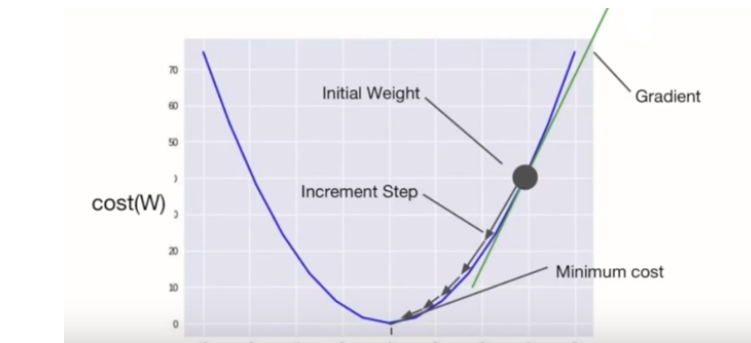
https://www.youtube.com/watch?v=D_ws0YyHAm8&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C&index=5

### 2.4.3 확률적 경사 하강법

함수의 최솟값은 변화율이 0인 지점. 

따라서 우리가 할 일은 변화율이 0이 되는 지점을 모두 찾고 

이 중에서 어떤 포인트의 함수 값이 가장 작은지 확인하는 것.

가장 작은 함수값을 찾을때 

N 개로 이루어진 다항식에서 N의 갯수가 적을경우 식을 푸는것이 가능

하지만 가중치의 갯수(N)의 갯수가 많을경우 해석적으로 해결하는것이 어려움

그러므로 경사하강법을 사용하여 loss를 감소시킬수있음

미니 배치 확률적 경사 하강법(mini-batch stochastic gradient descent)(미니 배치 SGD)

1. 훈련 샘플 배치 x와 이에 상응하는 타깃 y를 추출합니다.
2. x로 네트워크를 실행하고 예측 y_pred를 구합니다.
3. 이 배치에서 y_pred와 y 사이의 오차를 측정하여 네트워크의 손실을 계산합니다.
4. 네트워크의 파라미터에 대한 손실 함수의 그래디언트를 계산합니다(역방향 패스    (backward pass)).
5. 그래디언트의 반대 방향으로 파라미터를 조금 이동시킵니다. 예를 들어 W -= step * gradient처럼 하면 배치에 대한 손실이 조금 감소할 것입니다.

미니 배치 SGD의 한계

step의 값이 너무 작을경우 많은 반복, 지역 최솟값에 갇힘<br>
            너무 많을경우 임의의 위치로 이동 할 수 있음.

여러가지 변종

SGD : 반복마다 하나의 샘플과 하나의 타깃을 뽑는것.<br>
batch SGD : 가용한 모든 데이터를 사용하여 반복을 실행

이외에 때 현재 그래디언트 값만 보지 않고 이전에 업데이트된 가중치를 여러 가지 다른 방식으로 고려하는 SGD 변종<br>
ex) 모멘텀을 사용한 SDG, Adagrad, RMSProp 이러한 변종을 최적화방법 또는 옵티마이저 라 부름

여러 변종이 사용하는 모멘텀(momentum) : 현재 기울기 값 뿐만 아니라 속도를 함께 고려하여 공을 움직임으로써 지역최솟값에 갇히는걸 방지함

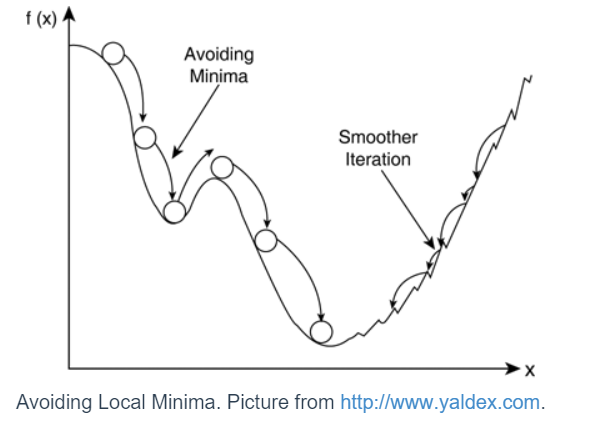

### 2.4.4 변화율 연결: 역전파 알고리즘(backpropagation)

앞의 알고리즘에서 함수가 미분 가능하다고 가정

3개의 텐서연산 a, b, c와 가중치 행렬 W1, W2, W3로 구성된 네트워크 f

f(W1, W2, W3) = a(W1, b(W2, c(W3))) 미적분에서 이렇게 연결된 함수는 연쇄법칙(chain rule)라 부르는 항등식 f (g(x))' = f '(g(x)) * g'(x) 을 사용하여 유도 가능

연쇄 법칙을 신경망의 그래디언트 계산에 적용하여 역전파(Backpropagation) 알고리즘이 탄생

Backpropagation는 최종 손실 값에서부터 시작, 최상위 층에서 하위 층까지 거꾸로 진행.

향후 몇 년 동안은 텐서플로처럼 기호 미분(symbolic differentiation)이 가능한 최신 프레임워크를 사용하여 신경망을 구현할 것임.

텐서플로등을 사용할 경우 그래디언트 함수를 호출하는것으로 단순화 될수있음

### 2.5 첫 번째 예제 다시 살펴 보기

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

입력 이미지의 데이터 타입은 float32로, 훈련 데이터는 (60000, 784) 크기, 테스트 데이터는 (10000, 784) 크기의 넘파이 배열로 저장됩니다.

초기 (60000,28,28) , (10000,28,28) -->(reshape) (60000, 784)

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

2개의 Dense층이 연결 relu와 softmax 연산을 적용

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

네트워크 컴파일<br>
categorical_crossentropy : 손실함수<br>
미니 배치 SGD를 통해 손실 감소<br>
rmsprop 옵티마이저를 통해 경사 하강

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

batch의 사이즈가 128이고 epoch = 5이므로 에포크마다 469번의수를 가지고 5번 반복하므로 2345번의 그래디언트를 업데이트 함